In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
deliveries = pd.read_csv(r"D:\IPL-Project--master\PROJECT_FOLDER\datasets\mod_deliveries.csv")
deliveries.sample()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
209132,1304051,1,Rajasthan Royals,Sunrisers Hyderabad,17,6,SO Hetmyer,T Natarajan,R Parag,4,0,4,NaN,0,NaN,NaN,NaN


In [17]:
matches = pd.read_csv(r"D:\IPL-Project--master\PROJECT_FOLDER\datasets\mod_matches.csv")
matches.sample()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
935,1304106,2022,Mumbai,2022-05-13,League,JM Bairstow,Brabourne Stadium,Punjab Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Punjab Kings,runs,54.0,210.0,20.0,N,NaN,J Madanagopal,N Pandit


In [20]:
mod_data = pd.read_csv(r"D:\IPL-Project--master\ipl_final_data.csv")
mod_data.sample()

,batting_team,bowling_team,venue,runs_left,ball_left,wicket_left,crr,rrr,result
19904,Mumbai Indians,Chennai Super Kings,Dr DY Patil Sports Academy,145,87,9,4.18,10.0,0


### performance of teams over the years

In [40]:
data = deliveries.merge(matches[['match_id','season']],on = 'match_id')

In [42]:
data

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,season
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,2008
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2008
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,2008
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2008
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,2024
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,2024
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,2024
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,2024


In [80]:
def team_performance_over_years(team_name):
    teams_runs = data[data['batting_team'] == team_name].groupby('season')['total_runs'].sum()
    teams_wicket = data[data['bowling_team'] == team_name].groupby('season')['is_wicket'].sum()


    # Unique seasons
    seasons = teams_runs.index

    # Create subplots with shared x-axis
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Runs by Season", "Wickets by Season"))

    # Add runs plot
    fig.add_trace(
        go.Scatter(
            x=seasons,
            y=teams_runs,
            mode='lines+markers',
            name='Total Runs',
            line=dict(color='blue')
        ),
        row=1, col=1
    )

    # Add wickets plot
    fig.add_trace(
        go.Scatter(
            x=seasons,
            y=teams_wicket,
            mode='lines+markers',
            name='Total Wickets',
            line=dict(color='green')
        ),
        row=2, col=1
    )

    # Update layout
    fig.update_layout(
        title=f"{team_name} Performance Over Seasons",
        xaxis=dict(title="Season"),
        yaxis=dict(title="Runs"),
        yaxis2=dict(title="Wickets"),
        height=600,
        width=800,
        showlegend=True
    )

    # Show plot
    fig.show()


    

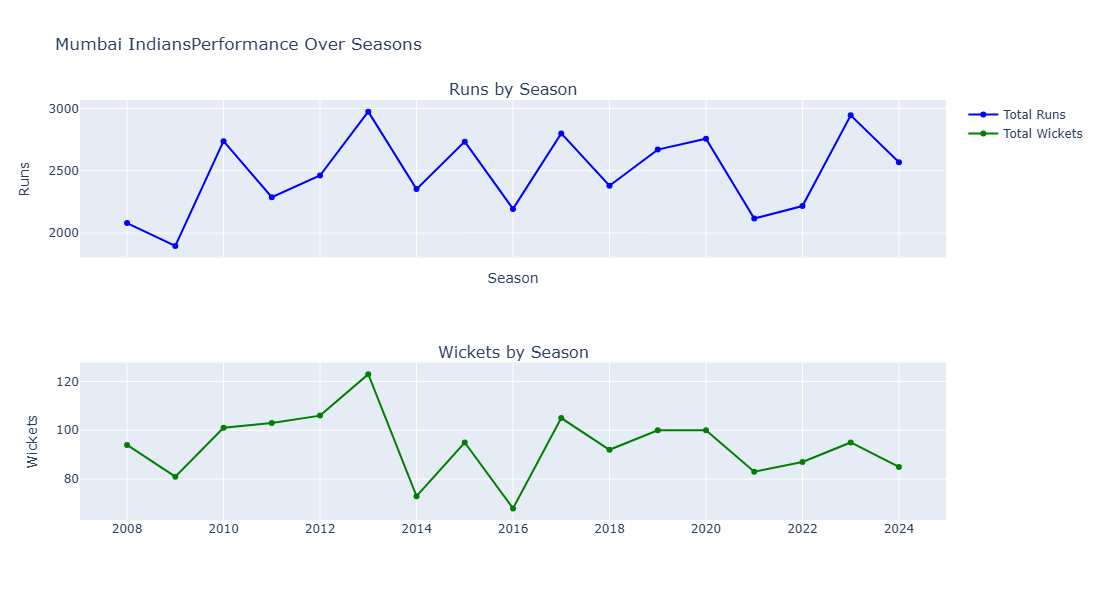

In [84]:
team_performance_over_years('Mumbai Indians')

### players performance

In [87]:
data

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,season
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,2008
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2008
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,2008
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2008
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,2024
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,2024
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,2024
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,2024


In [137]:
def players_performance(player_name):
    

   # Create a dataframe for the scatter plot
    player_stats = pd.DataFrame({
    'Metric': ['Total Runs', 'Total Wickets', 'Number of Matches', 'Player of the Match Awards'],
    'Value': [total_runs, total_wickets, no_of_matches, player_of_match]
    })

    # Create scatter plot using Plotly
    fig = px.scatter(
    player_stats,
    x='Metric',
    y='Value',
    size='Value',
    color='Metric',
    title=f"Performance Overview of {player_name}",
    labels={'Value': 'Count', 'Metric': 'Performance Metric'},
    template='plotly_dark'
    )
    fig.show()

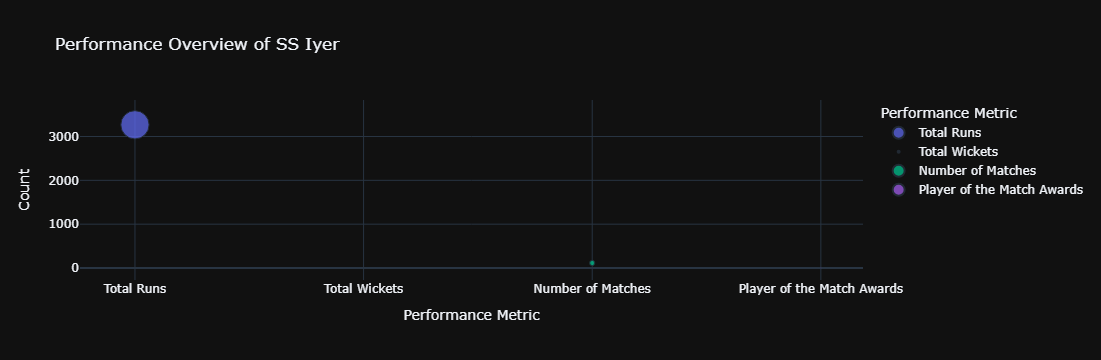

In [139]:
players_performance('SS Iyer')

In [117]:
matches[matches['player_of_match'] == 'SS Iyer'].shape[0]

6

In [131]:
import pandas as pd
import plotly.express as px
import streamlit as st

# Load datasets (replace with your dataset paths or variables)
data = pd.read_csv('datasets/mod_deliveries.csv')  # Example dataset
matches = pd.read_csv('datasets/mod_matches.csv')

# Streamlit filter for player selection
player_list = data['batter'].unique()
player_name = st.sidebar.selectbox("Select a Player:", player_list)

# Calculate player stats
total_runs = data[data['batter'] == player_name]['total_runs'].sum()
total_wickets = data[data['bowler'] == player_name]['is_wicket'].sum()
no_of_matches = data[(data['batter'] == player_name) | (data['bowler'] == player_name)]['match_id'].nunique()
player_of_match = matches[matches['player_of_match'] == player_name].shape[0]

# Create a dataframe for the scatter plot
player_stats = pd.DataFrame({
    'Metric': ['Total Runs', 'Total Wickets', 'Number of Matches', 'Player of the Match Awards'],
    'Value': [total_runs, total_wickets, no_of_matches, player_of_match]
})

# Create scatter plot using Plotly
fig = px.scatter(
    player_stats,
    x='Metric',
    y='Value',
    size='Value',
    color='Metric',
    title=f"Performance Overview of {player_name}",
    labels={'Value': 'Count', 'Metric': 'Performance Metric'},
    template='plotly_dark'
)

# Display the plot in Streamlit
st.plotly_chart(fig)


FileNotFoundError: [Errno 2] No such file or directory: 'datasets/mod_deliveries.csv'